## E-Commerce Sales Analysis

### About the Data :
The dataset contains information about transactions details in an e-commerce based on The UK during the year 2019. It Consists of 8 rows containing date of transaction, price of the products, quantity of the purchase and the country of origin.

### Objectives :
1. What is the trend of Sales in 2019?
2. What can be improved to increase earnings?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [2]:
df = pd.read_csv("Sales Transaction v.4a.csv")

In [3]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [4]:
df.dtypes

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [5]:
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

We can see that there is almost no empty data on the dataset but let's take a look a the missing data

In [6]:
df[df['CustomerNo'].isna()]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
6511,C581406,12/8/2019,46000M,Polyester Filler Pad 45x45cm,6.19,-240,NaN,United Kingdom
6512,C581406,12/8/2019,46000S,Polyester Filler Pad 40x40cm,6.19,-300,NaN,United Kingdom
90098,C575153,11/8/2019,22947,Wooden Advent Calendar Red,44.25,-1,NaN,United Kingdom
102671,C574288,11/3/2019,22178,Victorian Glass Hanging T-Light,25.37,-1,NaN,United Kingdom
117263,C573180,10/28/2019,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,NaN,United Kingdom
163160,C569495,10/4/2019,21843,Red Retrospot Cake Stand,21.47,-1,NaN,United Kingdom
190598,C567518,9/20/2019,22846,Bread Bin Diner Style Red,27.62,-1,NaN,United Kingdom
192284,C567518,9/20/2019,21871,Save The Planet Mug,11.94,-12,NaN,United Kingdom
242406,C563015,8/11/2019,46000M,Polyester Filler Pad 45x45cm,10.25,-160,NaN,United Kingdom
242407,C563015,8/11/2019,46000S,Polyester Filler Pad 40x40cm,10.25,-220,NaN,United Kingdom


Most of the missing data is from cancelled order (canceled order are shown by the negative number in the quantity column), and since the number of missing data is very little, we can just drop it from the data set.

In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(536295, 8)

In [9]:
df[df.duplicated()]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
985,581497,12/9/2019,21481,Fawn Blue Hot Water Bottle,7.24,1,17497.0,United Kingdom
1365,581538,12/9/2019,23275,Set Of 3 Hanging Owls Ollie Beak,6.19,1,14446.0,United Kingdom
1401,581538,12/9/2019,22992,Revolver Wooden Ruler,6.19,1,14446.0,United Kingdom
1406,581538,12/9/2019,22694,Wicker Star,6.19,1,14446.0,United Kingdom
1409,581538,12/9/2019,23343,Jumbo Bag Vintage Christmas,6.19,1,14446.0,United Kingdom
...,...,...,...,...,...,...,...,...
535227,536559,12/1/2018,51014L,Feather Pen Light Pink,11.12,12,17873.0,United Kingdom
535310,536569,12/1/2018,22111,Scottie Dog Hot Water Bottle,15.32,1,16274.0,United Kingdom
535327,536569,12/1/2018,21809,Christmas Hanging Tree With Bell,11.53,1,16274.0,United Kingdom
535960,536592,12/1/2018,82613A,Metal Sign Cupcake Single Hook,12.82,1,16592.0,United Kingdom


We should check for duplicated data and drop it.

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(531095, 8)

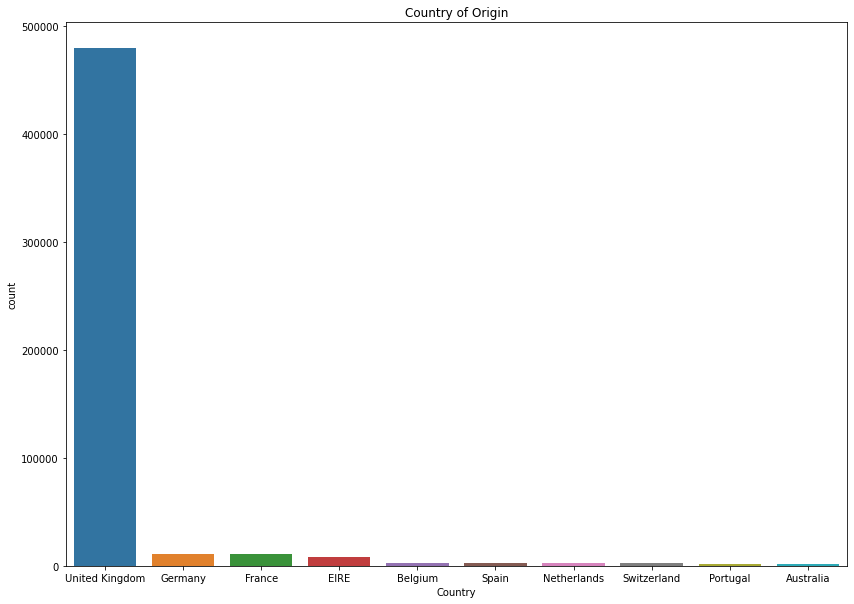

In [12]:
plt.figure(figsize = (14,10))

sns.countplot(x = 'Country', data = df,
             order = df['Country'].value_counts()[:10].index).set(title = "Country of Origin")

sns.set_context("paper", rc={"figure.figsize": (8, 6)})
plt.show()

Based on the graph above, we can see that most of the transaction are from The UK. This make sense since this e-commerce is based on The UK. Some other transactions originates from some european countries such as Germany, France and Ireland but the number of transaction differs very greatly between The UK and other countries.

Next, we should see how is the sales trend in 2019

In [13]:
df["Date"] = pd.to_datetime(df["Date"])

Since the 'Date' column is still in the object data type, we should change it to date data type.

In [14]:
pd.DatetimeIndex(df['Date']).year

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='Date', length=531095)

In [15]:
df['Month'] = df['Date'].dt.month

In [16]:
df['Year'] = df['Date'].dt.year

In [17]:
df['Day'] = df['Date'].dt.day

In [18]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Day
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,12,2019,9
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,12,2019,9
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,12,2019,9
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,12,2019,9
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,12,2019,9


In [19]:
df = df[df['Year'] == 2019]

We can obtain the amount of sales by multiplying the price and the quantity of each transactions. Then we can see how is the sales trend in the year 2019.

In [20]:
df['Sales'] = df['Price']*df['Quantity']

In [21]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,Day,Sales
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,12,2019,9,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,12,2019,9,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,12,2019,9,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,12,2019,9,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,12,2019,9,71.64


In [22]:
canceled = df[df['Sales'] < 0]
canceled['Sales']  = canceled['Sales']*-1

C:\Users\User\AppData\Local\Temp/ipykernel_42464/735527788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled['Sales']  = canceled['Sales']*-1


In [23]:
df = df[df['Sales'] > 0]

In [24]:
canceled.shape

(7831, 12)

In [25]:
df.shape

(481702, 12)

In [26]:
canceled.shape

(7831, 12)

In [27]:
Sales = df.groupby(['Year', 'Month']).sum()['Sales'].reset_index()

Sales_c = canceled.groupby(['Year', 'Month']).sum()['Sales'].reset_index()


In [28]:
Sales_c

,Year,Month,Sales
0,2019,1,909475.35
1,2019,2,35017.95
2,2019,3,44634.22
3,2019,4,173307.89
4,2019,5,47965.25
5,2019,6,81752.19
6,2019,7,69522.73
7,2019,8,140145.46
8,2019,9,84345.44
9,2019,10,247244.55


In [29]:
print("Percentage of canceled order :", canceled['Sales'].sum()/df['Sales'].sum()*100)

Percentage of canceled order : 4.22438156949854


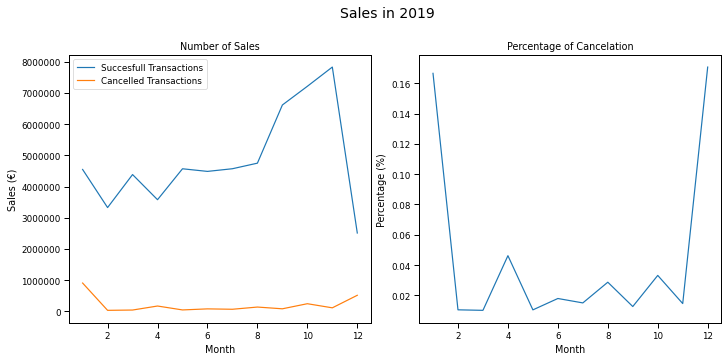

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

fig.suptitle('Sales in 2019', fontsize=14)
fig.tight_layout(pad=2.0)

ax1.ticklabel_format(style='plain')
ax1.plot(Sales['Month'], Sales['Sales'])
ax1.plot(Sales_c['Month'], Sales_c['Sales'])
ax1.set_title("Number of Sales")
ax1.set_xlabel("Month")
ax1.set_ylabel("Sales (€)")
ax1.legend(['Succesfull Transactions', 'Cancelled Transactions'])

ax2.plot(Sales['Month'],Sales_c['Sales']/(Sales['Sales'] + Sales_c['Sales']))
ax2.set_title("Percentage of Cancelation")
ax2.set_xlabel("Month")
ax2.set_ylabel("Percentage (%)")

plt.show()

We can see from the "Number of Sales" graph that the highest number of sales in 2019 is in between September and November. The sales number in December is the lowest because the data only provides transactions until the 9th of December. 

There are also a large number of order cancelation especially in January and December with about 17% of cancelation out of the total orders. It is mentioned on the dataset descriptions that most cancelations are due to no stocks available.

Next we can see the sales made each day for each months.

In [31]:
Sales_d = df.groupby(['Month','Day']).sum()['Sales'].reset_index()
Sales_d_c = canceled.groupby(['Month', 'Day']).sum()['Sales'].reset_index()

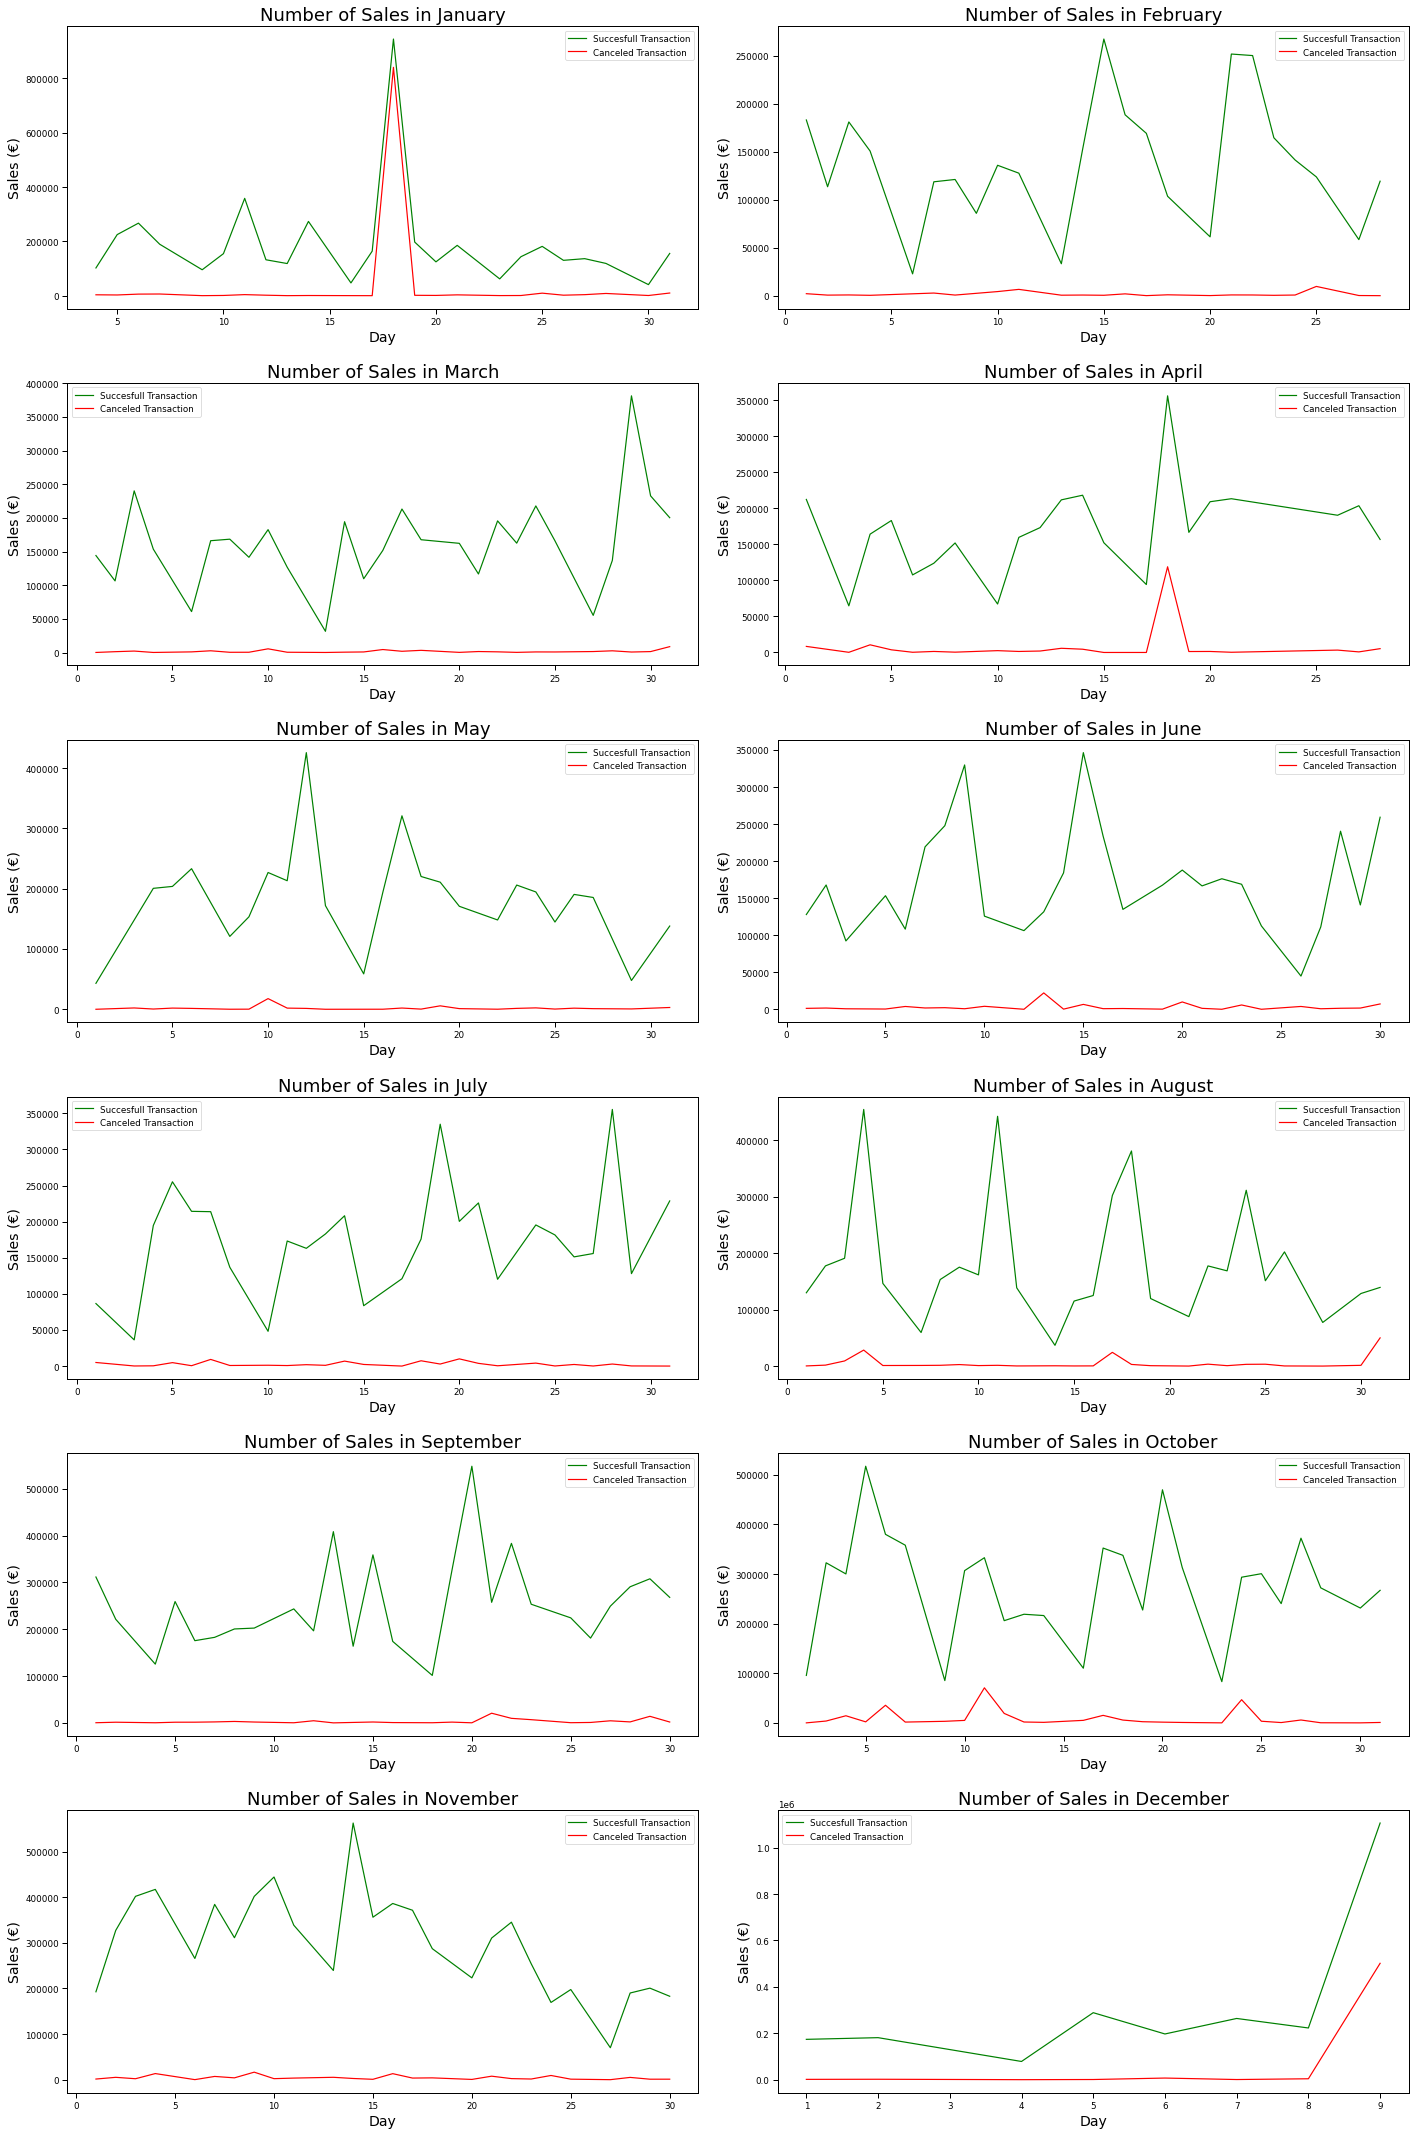

In [32]:
import calendar

fig, axs = plt.subplots(6, 2,figsize = (20, 30))

for i in range(0,6):
    for j in range(0,2):
        axs[i,j].plot(Sales_d[Sales_d['Month'] == i*2+j+1]['Day'], Sales_d[Sales_d['Month'] == i*2+j+1]['Sales'],'g')
        axs[i,j].plot(Sales_d_c[Sales_d_c['Month'] == i*2+j+1]['Day'], Sales_d_c[Sales_d_c['Month'] == i*2+j+1]['Sales'],'r')
        title = "Number of Sales in " + calendar.month_name[i*2+j+1]
        axs[i,j].set_title(title, fontsize = 18)
        axs[i,j].set_xlabel("Day", fontsize= 14)
        axs[i,j].set_ylabel("Sales (€)", fontsize = 14)
        axs[i,j].legend(["Succesfull Transaction", "Canceled Transaction"], loc=0)

fig.tight_layout(pad=2.0)
plt.show()

The number of sales made each day of the months varies for each months. One pattern that we can notice is that there is always an increase in number of sales in the middle of the month (day 15 - day 20) with the exception of November(increase in sales at day 14) and December(not enough data).

### Summary :
- Most of the transaction is from The United Kingdom, followed by other european countries such as Germany, France, and Ireland
- The most highest number of sales are from between September and November, while the lowest is in the earlier part of the year.
- The period of time where there always be an increase in sales is in the middle of the months (day 15 - day 20)
- There are a lot of cancelation in some months during end of the year and the new year.

### Recommendations:
- The sales are mostly from The United Kingdom, so it might be a good idea to try expanding to neighbouring european countries such as Germany or France.
- It might be good to introduce some promos or other kind of marketing campaign in the middle of each month.
- Try to optimize the stocks and logistics to reduce the number of cancelation and increase sales